# Introduction

This fictional dataset of IBM employee attrition comes from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home.

The goal of this project is to find the variables that might explain why the employees left and use them to point out some areas on which the company can improve.

The guide to build a logistic regression comes from [this post](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8).

The steps of data analysis on this notebook are:
1. Getting familiar with the data
2. Distributions of the variables, via graphs
3. Selecting explanatory variables
4. Building a logistic regression model
5. Logistic regression classifier
6. Alternate logistic regression models and random forest

# 1. Getting familiar with the data

### Explanation on the variables
1. `Age`<br>
2. `Attrition` - 'Yes', 'No'<br>
3. `BusinessTravel` - 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'<br>
4. `DailyRate`<br>
5. `Department` - 'Research & Development', 'Sales', 'Human Resources'<br>
6. `DistanceFromHome`<br>
7. `Education` - 1-5. No extra explanation was provided.<br>
8. `EducationField` - 'Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources', 'Other'<br>
9. `EmployeeNumber`<br>
10. `EnvironmentSatisfaction` - 1-4<br>
11. `Gender` - 'Male', 'Female'<br>
12. `HourlyRate`<br>
13. `JobInvolvement` - 1-4<br>
14. `JobLevel` - 1-5<br>
15. `JobRole` - 'Laboratory Technician', 'Sales Executive', 'Manager', 'Healthcare Representative', 'Manufacturing Director', 'Human Resources', 'Sales Representative', 'Research Scientist', 'Research Director'<br>
16. `JobSatisfaction` - 1-4<br>
17. `MaritalStatus` - 'Single', 'Married', 'Divorced'<br>
18. `MonthlyIncome`<br>
19. `MonthlyRate`<br>
20. `NumCompaniesWorked`<br>
21. `Over18` - 'Y'. Everyone was over 18.<br>
22. `OverTime` - 'Yes', 'No'<br>
23. `PercentSalaryHike`<br>
24. `PerformanceRating` - '3', '4'. No other information was given.<br>
25. `RelationshipSatisfaction` - 1-4<br>
26. `StandardHours` - Everyone had 80.<br>
27. `StockOptionLevel` - 0-3<br>
28. `TotalWorkingYears`<br>
29. `TrainingTimesLastYear` - 0-6<br>
30. `WorkLifeBalance` - 1-4<br>
31. `YearsAtCompany`<br>
32. `YearsInCurrentRole`<br>
33. `YearsSinceLastPromotion`<br>
34. `YearsWithCurrManager`<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
pd.set_option("display.max_columns", 35)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [4]:
data.sample(n=5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
74,36,No,Travel_Rarely,132,Research & Development,6,3,Life Sciences,1,97,2,Female,55,4,1,Laboratory Technician,4,Married,3038,22002,3,Y,No,12,3,2,80,0,5,3,3,1,0,0,0
546,29,No,Travel_Rarely,1396,Sales,10,3,Life Sciences,1,749,3,Male,99,3,1,Sales Representative,3,Single,2642,2755,1,Y,No,11,3,3,80,0,1,6,3,1,0,0,0
1328,27,No,Travel_Rarely,728,Sales,23,1,Medical,1,1864,2,Female,36,2,2,Sales Representative,3,Married,3540,7018,1,Y,No,21,4,4,80,1,9,5,3,9,8,5,8
1046,44,No,Travel_Rarely,1467,Research & Development,20,3,Life Sciences,1,1475,4,Male,49,3,1,Research Scientist,2,Single,3420,21158,1,Y,No,13,3,3,80,0,6,3,2,5,2,1,3
1091,33,No,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,4,Male,44,2,2,Manufacturing Director,2,Single,4320,24152,1,Y,No,13,3,4,80,0,5,2,3,5,3,0,2


In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

I like listing the columns with `.dtypes` to see the types as well and check if there are unexpected ones like `uint8`.<br>
Certain variables don't seem useful for the model, so let's get rid of them.

In [6]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],
          axis=1, inplace=True)

In [7]:
print(data['Attrition'].value_counts())
print(data['Attrition'].value_counts(normalize=True))

No     1233
Yes     237
Name: Attrition, dtype: int64
No    0.83877551
Yes   0.16122449
Name: Attrition, dtype: float64


The ratio of employees who left to who stayed is about 84:16. We might have to fix this later if the classifier decides to always guess that a given employee left the company.

# 2. Distributions of the variables, via graphs

### Custom functions
I created boxplots, barplots, and displots with `Attrtion` as different colors to compare the variables among the employees who left and who stayed. As it turns out, I use these lines multiple times, so I created two custom functions to avoid repeating those lines.

In [8]:
def group_boxplot(data, variable_list, y_axis_title):
    """
    Draw boxplots for each of the given variables with 'Attrition' as hue.
    
    Arguments:
        data: DataFrame
        variable_list: variable names in list of strings
        y_axis_title: y-axis title (units) in string
    
    Returns:
        None
    """
    
    # I use pd.melt() to unpack some columns and use them as the x-axis variables
    melted_data = pd.melt(data, id_vars=['Attrition'], value_vars=variable_list)
    melted_data.rename(columns={'value': y_axis_title}, inplace=True)

    sns.boxplot(x='variable', y=y_axis_title, hue='Attrition', 
                data=melted_data, showmeans=True, palette=['salmon', 'grey'])
    plt.xlabel('')

In [9]:
def group_barplot(data, variable_list, row, col):
    """
    Draw barplots for each of the given variables with 'Attrition' as hue 
    and proportion as y-axis.
    
    Arguments:
        data: main DataFrame
        variable_list: variable names in list of strings
        row: number of rows of subplots
        col: number of columns of subplots
    
    Returns:
        None
    """
    
    for index, variable in enumerate(variable_list):
        prop_df = (data[variable]
                   .groupby(data['Attrition'])
                   .value_counts(normalize=True)
                   .rename('Proportion')
                   .reset_index()
                   .sort_values(by=['Attrition'], ascending=False))
        if row == 1:
            if col == 1:
                sns.barplot(x=variable, y='Proportion', hue='Attrition', 
                            data=prop_df, palette=['salmon', 'grey'])
            else:
                sns.barplot(x=variable, y='Proportion', hue='Attrition', 
                            data=prop_df, ax=ax[index%col], 
                            palette=['salmon', 'grey'])
        else:
            sns.barplot(x=variable, y='Proportion', hue='Attrition', 
                        data=prop_df, ax=ax[index//col][index%col], 
                        palette=['salmon', 'grey'])

In [10]:
def group_distplot(data, variable_list, row):
    """
    Draw distplot for each of the given variables. 
    The 'Yes' data will be plotted on the 1st column, and the 
    'No' data will be plotted on the 2nd column.
    
    Arguments:
        data: main DataFrame
        variable_list: variable names in list of strings
        row: number of rows of subplots
    
    Returns:
        None
        
    Note: plots on the 1st and 2nd column should have the
          same x-axis and y-axis ranges and the same number
          of bins
    """

    left = data.loc[data['Attrition'] == 'Yes']
    stayed = data.loc[data['Attrition'] == 'No']
    
    for index, variable in enumerate(variable_list):
        
        if row == 1:
            bin_count = len(sns.distplot(left[variable],
                                         kde=False, norm_hist=True,
                                         ax=ax[0], 
                                         color='salmon').patches)
            
            sns.distplot(stayed[variable], bins=bin_count,
                         kde=False, norm_hist=True,
                         ax=ax[1], color='grey')
            
            set_same_axes_range(ax)
            
        else:
            bin_count = len(sns.distplot(left[variable],
                                         kde=False, norm_hist=True,
                                         ax=ax[index][0], 
                                         color='salmon').patches)

            sns.distplot(stayed[variable], bins=bin_count,
                         kde=False, norm_hist=True,
                         ax=ax[index][1], color='grey')
            
            set_same_axes_range(ax[index])

# helper function that sets the same x-axis and y-axis range for
# two plots on the same row
def set_same_axes_range(ax):
    x_min = min(ax[0].get_xlim()[0], ax[1].get_xlim()[0])
    x_max = max(ax[0].get_xlim()[1], ax[1].get_xlim()[1])
    
    y_min = min(ax[0].get_ylim()[0], ax[1].get_ylim()[0])
    y_max = max(ax[0].get_ylim()[1], ax[1].get_ylim()[1])
 
    ax[0].set_xlim([x_min, x_max])
    ax[1].set_xlim([x_min, x_max])
    
    ax[0].set_ylim([y_min, y_max])
    ax[1].set_ylim([y_min, y_max])

**Salmon** color represents data of the employees who *left* the company.<br>
**Grey** color represents data of the employees who *stayed* with the company.<br>
<br>
For the variables that seemed numeric, I created boxplots and distplots.<br>
For the variables that seemed categorical or ordinal, I created barplots.

### Years

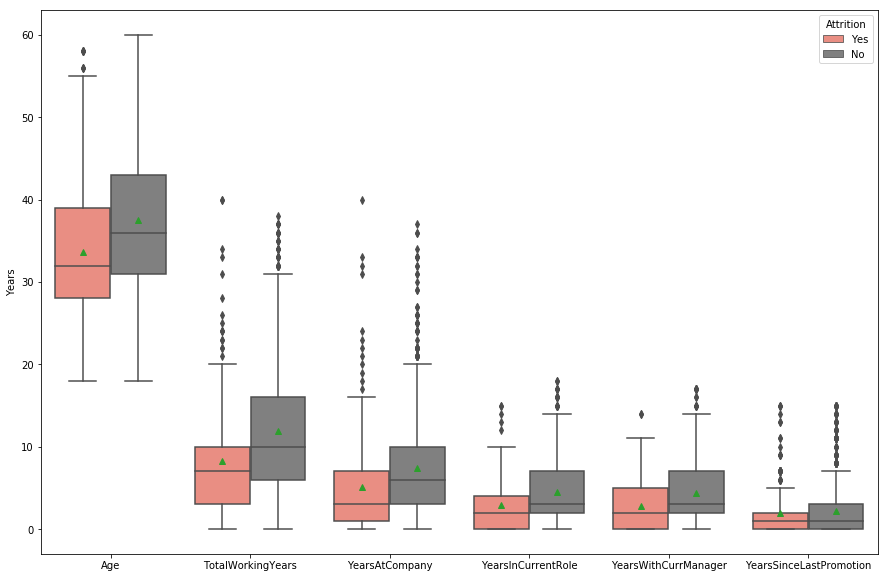

In [11]:
variable_list = (['Age', 'TotalWorkingYears', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsWithCurrManager',
                  'YearsSinceLastPromotion'])

plt.figure(figsize = (15,10))
group_boxplot(data, variable_list, 'Years')

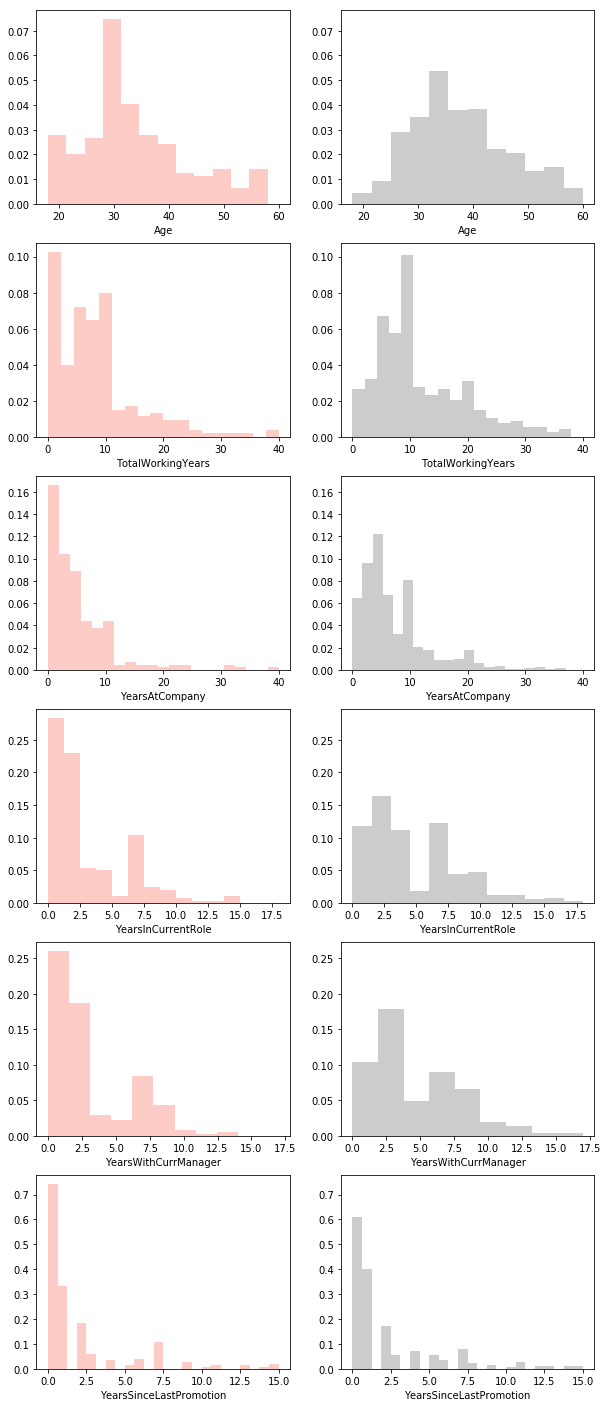

In [12]:
variable_list = ['Age', 'TotalWorkingYears', 'YearsAtCompany',
                 'YearsInCurrentRole', 'YearsWithCurrManager',
                 'YearsSinceLastPromotion']

row, col = len(variable_list), 2
fig, ax = plt.subplots(row, col, figsize=(10,25))
group_distplot(data, variable_list, row)

### Salary

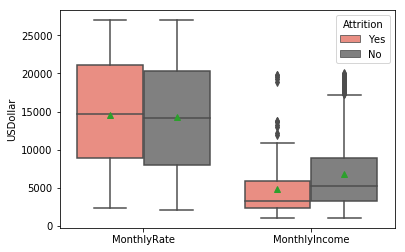

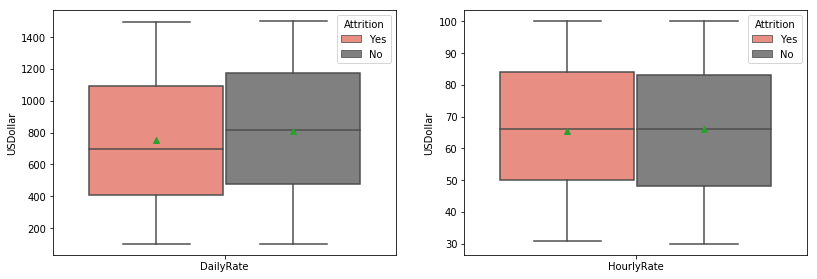

In [13]:
variable_list = ['MonthlyRate','MonthlyIncome']
group_boxplot(data, variable_list, 'USDollar')

plt.figure(figsize=(13.5, 4.5))
plt.subplot(1,2,1)
variable_list = ['DailyRate']
group_boxplot(data, variable_list, 'USDollar')
plt.subplot(1,2,2)
variable_list = ['HourlyRate']
group_boxplot(data, variable_list, 'USDollar')

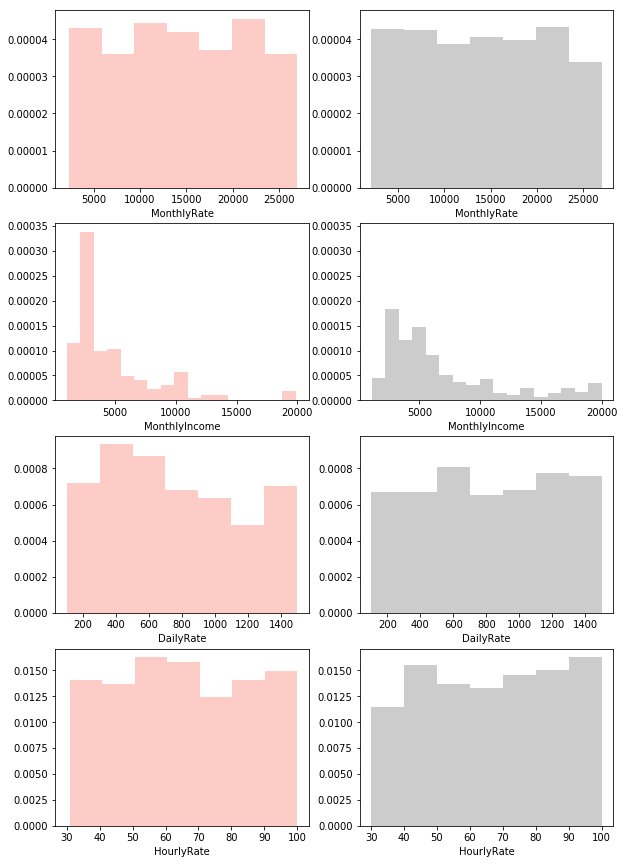

In [14]:
variable_list = ['MonthlyRate','MonthlyIncome',
                 'DailyRate', 'HourlyRate']

row, col = len(variable_list), 2
fig, ax = plt.subplots(row, col, figsize=(10,15))
group_distplot(data, variable_list, row)

### Performance

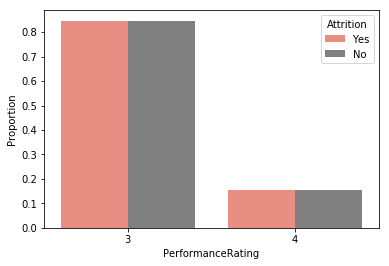

In [15]:
variable_list = ['PerformanceRating']

row, col = 1, 1
group_barplot(data, variable_list, row, col)

### Distance from home

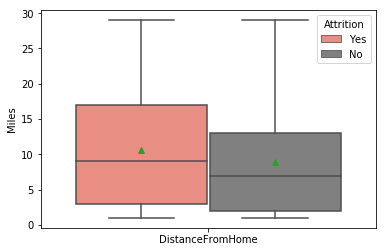

In [16]:
variable_list = ['DistanceFromHome']
group_boxplot(data, variable_list, 'Miles')

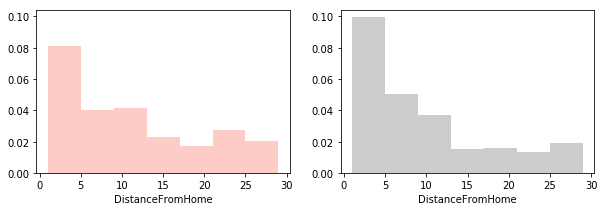

In [17]:
variable_list = ['DistanceFromHome']

row, col = len(variable_list), 2
fig, ax = plt.subplots(row, col, figsize=(10,3))
group_distplot(data, variable_list, row)

### Satisfaction Ratings (Ordinal variables)
These variables are ordinal variables. They are not like other numeric variables like 'DistanceFromHome' because the values are not equally spaced. For example, I cannot say that the difference between the satisfaction scores of 1 and 2 is the same as the difference between the 3 and 4. The ordinal variables are not categorical either because there is an ordering of the values. The satisfaction scores of 1 and 4 are not only different, but there is a better/worse or stronger/weaker aspect to them.<br><br>
I had thought about using these variables as categorical variables and throw away the ordering, but [a few](https://www.researchgate.net/post/Is_a_Likert-type_scale_ordinal_or_interval_data) [posts](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3886444) [I read](http://users.sussex.ac.uk/~grahamh/RM1web/Levels%20of%20Measurement.pdf) [on the](https://www.statisticssolutions.com/can-an-ordinal-likert-scale-be-a-continuous-variable/) [Internet](https://stats.stackexchange.com/questions/15422/logistic-regression-for-questionnaires-on-7-points-likert-scale) recommend that if they are Likert-scale items (the survery questions that ask you if you strongly disagree, disagree, are neutral, agree, or strongly agree with a statement) and if they measure similar things, then one way to use the ordinal variables is to sum all the scores and treat it as a numeric variable.<br><br>
In my opinion, these variables are like Likert-scale items and can be deemed to measure similar things, in that they measure general satisfaction at work. I will sum these variables and try to use the sum as a numeric variable.

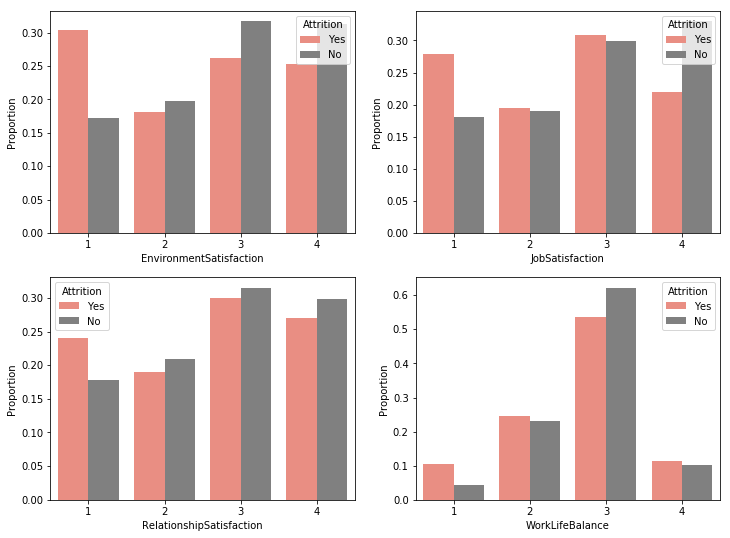

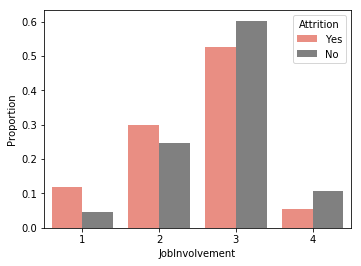

In [18]:
variable_list = ['EnvironmentSatisfaction', 'JobSatisfaction',
                 'RelationshipSatisfaction', 'WorkLifeBalance']

row, col = 2, 2
fig, ax = plt.subplots(row, col, figsize=(12,9))
group_barplot(data, variable_list, row, col)


variable_list = ['JobInvolvement']

plt.figure(figsize=(5.5, 4))
group_barplot(data, variable_list, 1, 1)

In [19]:
ord_vars = ['EnvironmentSatisfaction', 'JobSatisfaction',
            'RelationshipSatisfaction', 'WorkLifeBalance',
            'JobInvolvement']
data['SatisfactionSum'] = data[ord_vars].sum(axis=1)
data['SatisfactionSum'].describe()

count   1470.00000000
mean      13.65374150
std        2.14275330
min        6.00000000
25%       12.00000000
50%       14.00000000
75%       15.00000000
max       20.00000000
Name: SatisfactionSum, dtype: float64

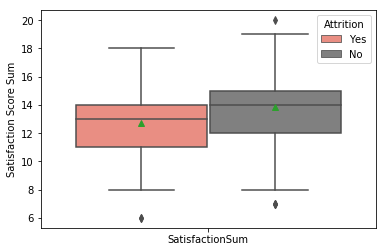

In [20]:
variable_list = ['SatisfactionSum']
group_boxplot(data, variable_list, 'Satisfaction Score Sum')

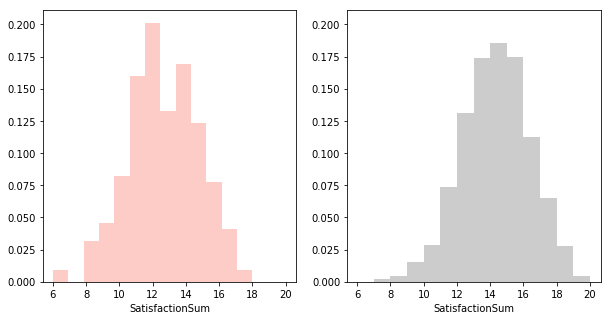

In [21]:
variable_list = ['SatisfactionSum']
row, col = len(variable_list), 2
fig, ax = plt.subplots(row, col, figsize=(10,5))
group_distplot(data, variable_list, row)

### Other variables
The 'Proportion' on the y-axix is relative proportion within each `Attrition` value. So from the left to right, the pink bars should add up to 1, and the grey bars should add up to 1. In short, these are histograms. I'm looking if the distributions of certain answers are significantly different between the employees who left and the employees who stayed.<br>

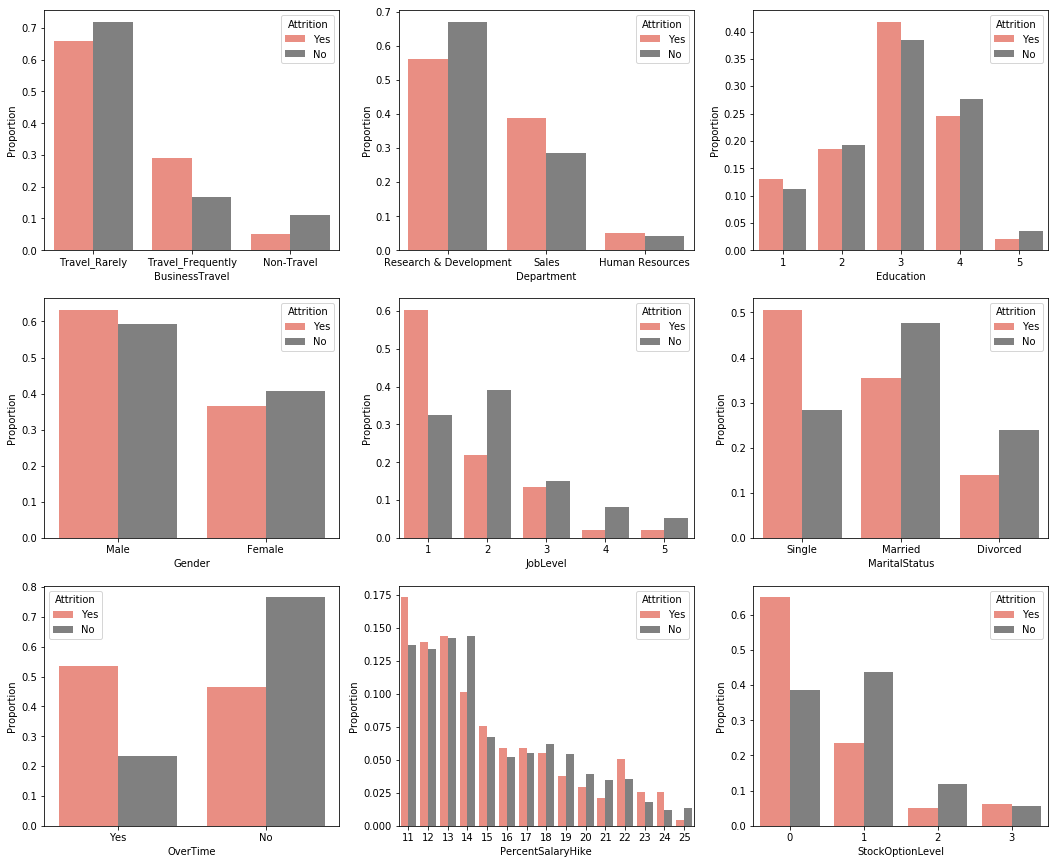

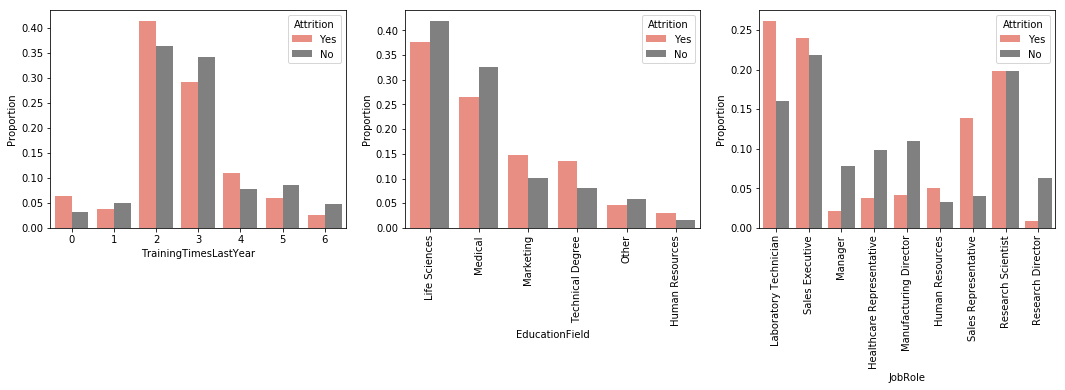

In [22]:
variable_list = ['BusinessTravel', 'Department', 'Education',
                 'Gender', 'JobLevel', 'MaritalStatus', 
                 'OverTime', 'PercentSalaryHike', 'StockOptionLevel']
row, col = 3, 3
fig, ax = plt.subplots(row, col, figsize=(18,15))
group_barplot(data, variable_list, row, col)

variable_list = ['TrainingTimesLastYear', 'EducationField', 'JobRole']
row, col = 1, 3
fig, ax = plt.subplots(row, col, figsize=(18,4))
group_barplot(data, variable_list, row, col)

# rotate x-labels on the last two plots
for ax in fig.axes[1:]:
    plt.sca(ax)
    plt.xticks(rotation=90)

# 3. Selecting explanatory variables

### Deciding categorical variables
Let's check which variables should be considered categorical.

In [23]:
data.nunique().sort_values(ascending=False)

MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
SatisfactionSum               15
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
Education                      5
JobLevel                       5
JobInvolvement                 4
EnvironmentSatisfaction        4
WorkLifeBalance                4
StockOptionLevel               4
JobSatisfaction                4
RelationshipSatisfaction       4
BusinessTravel                 3
Department                     3
MaritalStatus                  3
Attrition                      2
OverTime                       2
Performanc

Somewhat arbitrarily, I considered the variables with less than 10 levels as categorical variables. I'll also convert categorical values into strings.<br>

In [24]:
nume_vars = [x for x in data.columns if data[x].nunique() >= 10]
cate_vars = [x for x in data.columns if x not in nume_vars and x not in ord_vars 
                                                           and x != 'Attrition']

data[cate_vars] = data[cate_vars].applymap(str)

In [25]:
print(data[nume_vars].dtypes)
print()
print(data[cate_vars].dtypes)

Age                        int64
DailyRate                  int64
DistanceFromHome           int64
HourlyRate                 int64
MonthlyIncome              int64
MonthlyRate                int64
NumCompaniesWorked         int64
PercentSalaryHike          int64
TotalWorkingYears          int64
YearsAtCompany             int64
YearsInCurrentRole         int64
YearsSinceLastPromotion    int64
YearsWithCurrManager       int64
SatisfactionSum            int64
dtype: object

BusinessTravel           object
Department               object
Education                object
EducationField           object
Gender                   object
JobLevel                 object
JobRole                  object
MaritalStatus            object
OverTime                 object
PerformanceRating        object
StockOptionLevel         object
TrainingTimesLastYear    object
dtype: object


### 3.1. Correlation among numeric variables
Removing collinearity in explanatory variables leads to valid results about individual explanatory variables when interpreting the model results.<br><br>
I'll use Pearson correlation coefficient and Variance Inflation Factor (VIF).<br>
The tutorial to use VIF was found [here](https://etav.github.io/python/vif_factor_python.html).

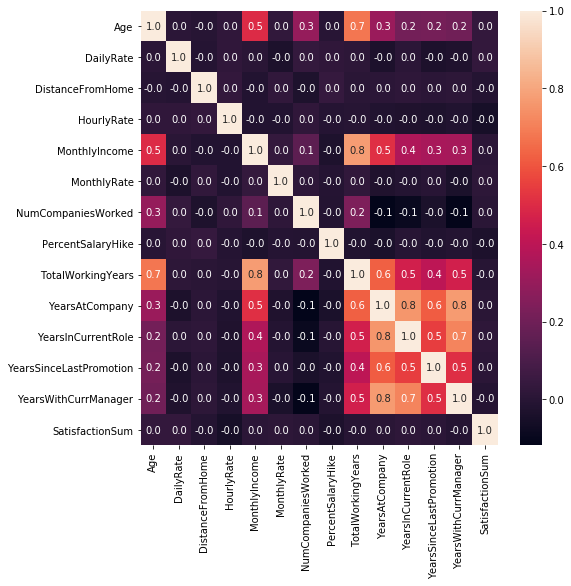

In [26]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(data[nume_vars].corr(), annot=True, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

I'll use 0.8 as the somewhat arbitrary threshold of strong correlation and look for variables that are highly correlated with multiple variables.<br><br>
`TotalWorkingYears` is highly correlated with `Age`, and `MonthlyIncome`, separately. This makes sense—if you are older, you probably have more working experience, and if you are more experienced, you probably earn more.<br><br>
`YearsAtCompany` is higly correlated with `YearsCurrentRole` and `YearsWithCurrManager`, separately. Although less clear, this kind of makes sense, too—if you worked at the company for more years, then there is probably a greater chance that you worked longer in your current role and with your current manager. Although having more years at the company should not necessarily lead to more years in current role and with current manager, If you did not stay at the company for long, then you did not even have a chance to stay at your current role or with your current manager.<br><br>
Surprisingly, none of the 'money' variables are correlated with one another, given that every employee in this dataset has `StandardHours` as 80. Perhaps, there are nonlinear relationships between the variables.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

vif_df = pd.DataFrame()
features = " + ".join(nume_vars)

y, X = dmatrices('Attrition ~' + features, data=data, return_type="dataframe")
vif_df['variable'] = X.columns
vif_df['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df.sort_values(by='vif_factor', ascending=False, inplace=True)
vif_df

,variable,vif_factor
0,Intercept,99.68981419
9,TotalWorkingYears,4.65007825
10,YearsAtCompany,4.56199907
13,YearsWithCurrManager,2.74937855
11,YearsInCurrentRole,2.68692683
5,MonthlyIncome,2.52957732
1,Age,1.99404326
12,YearsSinceLastPromotion,1.66902106
7,NumCompaniesWorked,1.23939110
2,DailyRate,1.01125237


According to the [StatsModels Doc](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html), a variable with the VIF greater than 5 is considered highly collinear with other explanatory variables, which causes high standard errror in parameter estimate later when building a model.<br><br>
Again, `TotalWorkingYears` and `YearsAtCompany` are the only numeric variables with VIF's close to 5, which suggest their collinearities with other numeric variables. Since the Pearson correlation coefficient suggested the same, I will drop these variables.

In [28]:
to_drop_1 = ['TotalWorkingYears', 'YearsAtCompany']

### 3.2. Correlation among categorical variables
I'll use pairwise chi-square tests and Variance Inflation Factor (VIF).<br><br>
- The null hypothesis is that the two categorical variables are independent.
- The alternative hypothesis is that the two categorical variables are not independent.<br><br>
If a p-value is less than 0.05, then there is a significance evidence that the two variable are not independent, which might suggest collinearity.

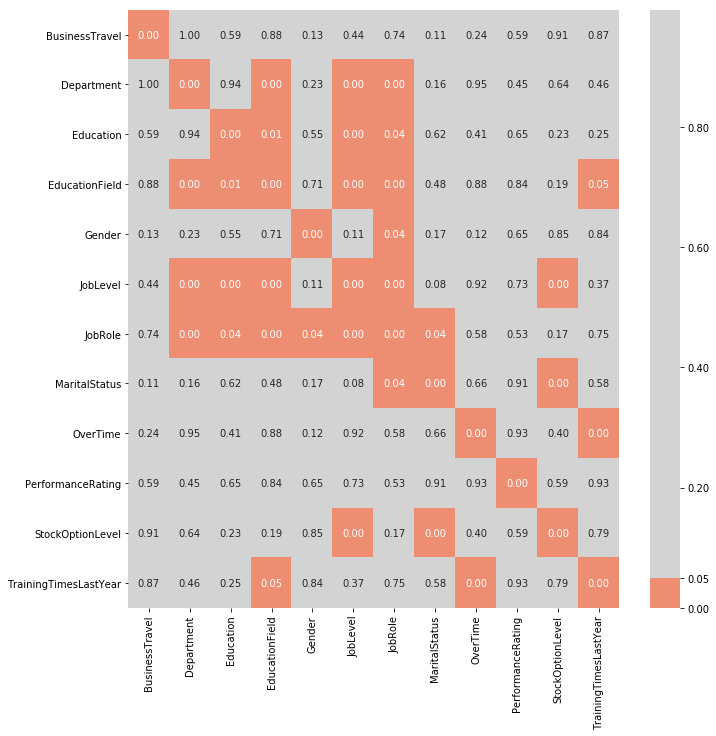

In [29]:
from matplotlib.colors import ListedColormap
from scipy.stats import chi2_contingency

colors = ['#D3D3D3'] * 19
colors.insert(0, '#ED8D71')
cmap = ListedColormap(sns.color_palette(colors).as_hex())

chi2_df = pd.DataFrame(0, index=cate_vars, columns=cate_vars)

for i in range(len(cate_vars)):
    cate_var_i = cate_vars[i]

    for j in range(i, len(cate_vars)): 
        cate_var_j = cate_vars[j]
        ct_table = pd.crosstab(data[cate_var_i], data[cate_var_j])
        chi2, p, dof, expected = chi2_contingency(ct_table)
        chi2_df.loc[cate_var_i, cate_var_j] = p
        chi2_df.loc[cate_var_j, cate_var_i] = p

f, ax = plt.subplots(figsize = (11, 11))
sns.heatmap(chi2_df, cmap=cmap, cbar_kws={"ticks":[0.0, 0.05, 0.2, 0.4, 0.6, 0.8, 1.0]}, 
            annot=True, fmt=".2f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

It looks like `Education`, `EducationField`, `Department`, `JobLevel`, `JobRole`, and `NumCompaniesWorked` are the variables that are not independent from several other explanatory variables.

In [30]:
vif_df = pd.DataFrame()
features = " + ".join(cate_vars)

y, X = dmatrices('Attrition ~' + features, data=data, return_type="dataframe")
vif_df['variable'] = X.columns
vif_df['vif_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df.sort_values(by='vif_factor', ascending=False, inplace=True)
vif_df.loc[vif_df['vif_factor'] > 4]

,variable,vif_factor
0,Intercept,265.60715231
4,Department[T.Sales],44.06701424
3,Department[T.Research & Development],43.70566096
9,EducationField[T.Life Sciences],24.16958127
11,EducationField[T.Medical],21.66562145
25,JobRole[T.Sales Executive],14.48296482
10,EducationField[T.Marketing],10.89462664
13,EducationField[T.Technical Degree],8.86377628
19,JobRole[T.Human Resources],7.28904281
35,TrainingTimesLastYear[T.2],7.10055492


It looks like some of the variable that were pointed out by the pairwise chi-square might be related to one another, according to VIF. Let's see if this makes sense.<br><br>
`Department` and `JobRole` are perhaps related to each other. If you are a sales representative, you are perhaps in the sales deparment.<br>
`Education` and `EducationField` might be related, too, but I'm not sure.<br>
And I'm not sure about `TrainingTimesLastYear` either.<br>
After dropping `Department`, `EducationField`, and `TrainingTimesLastYear`, though, the VIF's for the categorical variables were all less than 5.

In [31]:
to_drop_2 = ['Department', 'EducationField', 'TrainingTimesLastYear']

### 3.3. Independence of Attrition and numeric variables
I'll use t-test.
- The null hypothesis is that 'Attrition' and the numeric variables are independent, so the means of the numeric variables should be the same across the different values of 'Attrition'.
- The alternative hypothesis is that 'Attrition' and the numeric variables are not independent, and the means of the numeric variables are not the same across the different values of 'Attrition'.<br><br>
If a p-value is less than 0.05, then there is a significance evidence that 'Attrition' and the variable are not independent, which suggests that this variable can be useful in explaining 'Attrition'.

In [32]:
from scipy.stats import ttest_ind

ttest_df = pd.DataFrame()
ttest_df['variable'] = nume_vars
ttest_df['t'] = np.nan
ttest_df['p'] = np.nan

for index, nume_var in enumerate(nume_vars):
    
    left = data.loc[data['Attrition'] == 'Yes'][nume_var]
    stayed = data.loc[data['Attrition'] == 'No'][nume_var]
    t, p = ttest_ind(left, stayed)
    ttest_df.loc[index, 't'] = t
    ttest_df.loc[index, 'p'] = p
    
ttest_df.sort_values(by='p', ascending=False, inplace=True)
ttest_df

,variable,t,p
3,HourlyRate,-0.26228987,0.79313477
7,PercentSalaryHike,-0.51645733,0.60561282
5,MonthlyRate,0.58130582,0.56112360
11,YearsSinceLastPromotion,-1.26578766,0.20578996
6,NumCompaniesWorked,1.66801880,0.09552526
1,DailyRate,-2.17408368,0.02985816
2,DistanceFromHome,2.99470810,0.00279306
9,YearsAtCompany,-5.19630867,0.00000023
12,YearsWithCurrManager,-6.05906853,0.00000000
0,Age,-6.17866384,0.00000000


For `HourlyRate`, `PercentSalaryHike`, `MonthlyRate`, `YearsSinceLastPromotion`, and `NumCompaniesWorked`, there is no significant evidence to reject null hypothesis, based on the p-value of 0.05. This suggests that for these variables, the means grouped by 'Attrition' were close enough, and the variables and 'Attrition' are independent, and thus not that useful in explaining 'Attrition'.

In [33]:
to_drop_3 = ['HourlyRate', 'PercentSalaryHike', 'MonthlyRate', 
             'YearsSinceLastPromotion', 'NumCompaniesWorked']

### 3.4. Independence of Attrition and categorical variables
I'll use chi-square test. For the categorical variables, counts are used instead of means.
- The null hypothesis is that 'Attrition' and the categorical variables are independent.
- The alternative hypothesis is that 'Attrition' and the categorical variables are not independent.<br><br>
If a p-value is less than 0.05, then there is a significance evidence that 'Attrition' and the variable are not independent, which suggests that this variable can be useful in explaining 'Attrition'.

In [34]:
chi2_df = pd.DataFrame()
chi2_df['variable'] = cate_vars
chi2_df['chi2'] = np.nan
chi2_df['p'] = np.nan
chi2_df['dof'] = np.nan

for index, cate_var in enumerate(cate_vars):
    
    ct_table = pd.crosstab(data['Attrition'], data[cate_var])
    chi2, p, dof, expected = chi2_contingency(ct_table)
    chi2_df.loc[index, 'chi2'] = chi2
    chi2_df.loc[index, 'p'] = p
    chi2_df.loc[index, 'dof'] = dof
    
chi2_df.sort_values(by='p', ascending=False, inplace=True)
chi2_df

,variable,chi2,p,dof
9,PerformanceRating,0.00015475,0.99007455,1.00000000
2,Education,3.07396140,0.54552534,4.00000000
4,Gender,1.11696712,0.29057245,1.00000000
11,TrainingTimesLastYear,15.14645148,0.01914773,6.00000000
3,EducationField,16.02467412,0.00677398,5.00000000
1,Department,10.79600732,0.00452561,2.00000000
0,BusinessTravel,24.18241369,0.00000561,2.00000000
7,MaritalStatus,46.16367654,0.00000000,2.00000000
10,StockOptionLevel,60.59830109,0.00000000,3.00000000
5,JobLevel,72.52901311,0.00000000,4.00000000


For `PerformanceRating`, `Education`, and `Gender`, there is also no significant evidence to reject the null hypothesis, using the p-value of 0.05 as the threshold. This suggests that for these variables, the counts of each level of the variable were similar enough when grouped by 'Attrition', and that the variables and 'Attrition' are independent, which means they are not useful in explaining 'Attrition'.<br><br>
The insignificance of `PerformanceRating`, `Education`, and `Gender` makes sense since they did not have much difference in distributions when grouped by 'Attrition'.

In [35]:
to_drop_4 = ['PerformanceRating', 'Education', 'Gender']

### 3.5. Selection
- *3.1.* For checking correlation among numeric variables, I used Pearson correlation coefficients and Variance Inflation Factors (VIF), and considered the varibles that showed high corrleations in **both** tools as being not useful because they might cause collinearity.<br><br>
- *3.2.* For checking correlation among categorical variables, I used pairwise chi-square tests and VIF, and considered the variables that showed high correlations in **both** tools as being not useful.<br><br>
- *3.3.* For checking independence of 'Attrition' and numeric variables, I used t-tests as the only tool.<br><br>
- *3.4.* For checking independence fo 'Attirition' and categorical variables, I used chi-square tests as the only tool.<br><br>

In [36]:
poor_vars = to_drop_1 + to_drop_2 + to_drop_3 + to_drop_4
poor_vars = list(set(poor_vars))
selected_vars = [x for x in data.columns if x not in poor_vars and x not in ord_vars]
selected_vars

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'MonthlyIncome',
 'OverTime',
 'StockOptionLevel',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'SatisfactionSum']

In [37]:
nume_vars_selected = [x for x in selected_vars if data[x].nunique() >= 10]
cate_vars_selected = [x for x in selected_vars if x not in nume_vars and x != 'Attrition']

In [38]:
nume_vars_selected

['Age',
 'DailyRate',
 'DistanceFromHome',
 'MonthlyIncome',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'SatisfactionSum']

In [39]:
cate_vars_selected

['BusinessTravel',
 'JobLevel',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'StockOptionLevel']

# 4. Building a logistic regression model

### Creating dummy variables for categorical variables
I am going to create indicator columns (0 or 1) for each value of the categorical variables. For example, for the `Department` variable, I am going to create columns `Department_Research & Development`, `Department_Sales` and `Department_Human Resources`, which indicate if a row is in that department. Then, I'll get rid of the `Department` variable and one of the indicator columns because if I know all of the other indicators for that variable, then I can figure out the last indicator (if an employee is not in R&D or Sales, then they are in HR). This avoids creating a collinearity, a case where the independent variables can predict what other independent variables are, and thus making them no longer independent.

In [40]:
data_dummy = data.copy()[selected_vars]

for var in cate_vars_selected:
    cate_dummy_list = pd.get_dummies(data_dummy[var], prefix=var, drop_first=True)
    data_temp = data_dummy.join(cate_dummy_list)
    data_dummy = data_temp

In [41]:
data_dummy.drop(cate_vars_selected, axis=1, inplace=True)
data_dummy.columns.values

array(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'SatisfactionSum', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'JobLevel_2', 'JobLevel_3',
       'JobLevel_4', 'JobLevel_5', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3'], dtype=object)

Before I start building the model, let's change 'Yes' and 'No' values in the `Attrition` variable to '1' and '0'.

In [42]:
data_dummy['Attrition'] = np.where(data_dummy['Attrition'] == 'Yes', 1, 0)

### Splitting train and test datasets

In [43]:
from sklearn.model_selection import train_test_split

X = data_dummy.loc[:, data_dummy.columns != 'Attrition']
y = data_dummy.loc[:, data_dummy.columns == 'Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Logistic regression model with selected variables

In [44]:
import statsmodels.api as sm

logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.309896
         Iterations 8
                                 Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.301     
Dependent Variable:      Attrition             AIC:                   691.7665  
Date:                    2019-03-05 20:50      BIC:                   825.0477  
No. Observations:        1029                  Log-Likelihood:        -318.88   
Df Model:                26                    LL-Null:               -456.31   
Df Residuals:            1002                  LLR p-value:           2.1416e-43
Converged:               1.0000                Scale:                 1.0000    
No. Iterations:          8.0000                                                 
--------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------

This is my statistical model. It is valuable to study this results table even before I build a classifier and see its estimated predictive performance.<br><br>
The coefficients, standard errors, and the 95% confidence intervals are in log odds ratios, or the multiplicative change in log odds ratios on the dependent variable (which indicates if employee left the company). For numeric variables, this is resulted from one-unit change in the independent variable (i.e. one year older), and for categorical variables, this is resulted from the change from the reference level (i.e. different department).<br><br>
Since e^0 = 1, positive numbers here mean positive change in odds ratio (i.e. 5 times bigger), and negative numbers mean negative change in odds ratio (i.e. 0.1 times bigger, which means smaller).<br><br>
To narrow down the important variables that might best explain employee attrition, I am looking at the size of coefficient and whether the coefficient's sign stays positive or negative in the confidence interval. So if the sign changes in the interval, I cannot be really sure whether the variable tells me that the odds of attrition increase or decrease.<br><br>
And some of the noticeable variables that are associated with the employee leaving the company are `BusinessTravel_Travel_Frequently`, `JobRole_Sales Executive`, `JobRole_Sales Representative`, and `OverTime_Yes`.

In [45]:
np.exp(result.params).sort_values(ascending=False)

BusinessTravel_Travel_Frequently   7.27774308
JobRole_Sales Representative       6.25854723
OverTime_Yes                       6.03338547
JobRole_Sales Executive            5.17931189
JobRole_Laboratory Technician      3.88079837
BusinessTravel_Travel_Rarely       3.25985761
JobRole_Human Resources            2.67120409
MaritalStatus_Single               1.59609667
JobRole_Research Scientist         1.58026434
JobLevel_5                         1.36406904
JobLevel_3                         1.34856563
MaritalStatus_Married              1.29691289
JobRole_Manufacturing Director     1.29537188
JobRole_Manager                    1.18129054
DistanceFromHome                   1.04630566
MonthlyIncome                      0.99996426
DailyRate                          0.99963723
Age                                0.99235760
YearsWithCurrManager               0.94769919
YearsInCurrentRole                 0.94528431
SatisfactionSum                    0.77400369
StockOptionLevel_3                

# 5. Logtistic regression classifier

I will use Scikit-learn's logistic regression. Train the model with `.fit()` and then use the model to make predictions on the test data with `.predict()`.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs', max_iter=8000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [48]:
print(y_test['Attrition'].value_counts())
print(y_test['Attrition'].value_counts(normalize=True))

0    371
1     70
Name: Attrition, dtype: int64
0   0.84126984
1   0.15873016
Name: Attrition, dtype: float64


In [49]:
coef_df = pd.DataFrame(data=logreg.coef_[0], index=X_train.columns, columns=['coef'])
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values(by=['abs_coef'], ascending=False, inplace=True)
coef_df

,coef,abs_coef
OverTime_Yes,1.76101015,1.76101015
JobLevel_2,-1.16219404,1.16219404
BusinessTravel_Travel_Frequently,1.15370912,1.15370912
JobRole_Sales Executive,1.04866078,1.04866078
JobRole_Sales Representative,0.91765566,0.91765566
MaritalStatus_Single,0.87853518,0.87853518
StockOptionLevel_1,-0.61206028,0.61206028
BusinessTravel_Travel_Rarely,0.57052486,0.57052486
JobRole_Research Scientist,-0.53219550,0.53219550
JobLevel_3,0.51868821,0.51868821


88% overall accuracy of the model sounds good, but the test data was already over-84% skewed to the employees who stayed. But it would still be valuable to correctly classify the employees who left, so let's see how the model did.

### Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[364   7]
 [ 45  25]]


So the Scikit-learn's confusion matrix looks a little different from a traditional one. 

Normally, a confusion matrix looks like:<br>
|  True positive     |  False positive  |<br>
|  False negative  |  True negative   |
<br>

In Scikit-learn, a confusion matrix looks like:<br>
|  True negative    |  False positive  |<br>
|  False negative  |  True positive    |

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       371
           1       0.78      0.36      0.49        70

   micro avg       0.88      0.88      0.88       441
   macro avg       0.84      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441



Also, the recall on `1's` is not good (< 36%). The classifier might have learned how to predict who will stay, but it is not good at figuring out who will leave.

### ROC curve

The area under the ROC curve can be a tool to compare different models. To quote the Scikit-learn documentation which quotes Wikipedia:<br><br>
"A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate."

Below is another custom function since I will use it multiple times to graph the ROC curves.

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(classifier, X_test, y_test, classifier_name):
    """
    Draw ROC curve for a given classifier and testing data.
    
    Arguments:
        classifier: scikit-learn classifier
        X_test: testing data that the classifier should be able to .predict()
                in array-like shape
        y_test: testing values in array-like shape
        classfier_name: name of classifier in string
    
    Returns:
        None
    """
        
    roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label=classifier_name + '(area = %0.2f)' 
             % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

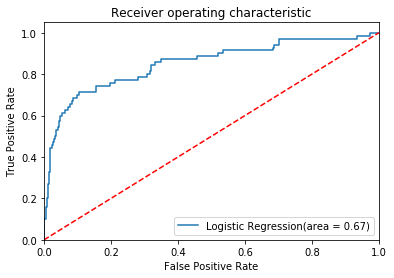

In [53]:
plot_roc_curve(logreg, X_test, y_test, 'Logistic Regression')

# 6. Alternate logistic regression models and random forest

### Oversampling using SMOTE

SMOTE creates new data points by randomly choosing one of the k-nearest-neighbors and tweaking it.<br>
The information about oversampling came from [this post](https://beckernick.github.io/oversampling-modeling/) and [this post](https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79).

I am oversampling just on the training data because I would not want to create my own test data.

In [54]:
from imblearn.over_sampling import SMOTE

over_sample = SMOTE(random_state=0)
over_sample_X, over_sample_y = over_sample.fit_sample(X_train, 
                                                      y_train.values.ravel())
over_sample_X = pd.DataFrame(data=over_sample_X, columns=X_train.columns)
over_sample_y = pd.DataFrame(data=over_sample_y, columns=['Attrition'])

print("After oversampling, there are:")
print(("{total} observations in the training sets, "
      "{yes} of which are 1's and {no} of which are 0's")
     .format(total=len(over_sample_y),
             yes=len(over_sample_y[over_sample_y['Attrition'] == 1]),
             no=len(over_sample_y[over_sample_y['Attrition'] == 0])))

After oversampling, there are:
1724 observations in the training sets, 862 of which are 1's and 862 of which are 0's


The total number of samples increased from 1470 to 1724, and the ratios of employees who left and stayed are the same.

### Logistic regression with SMOTE

In [55]:
logreg = LogisticRegression(solver='lbfgs', max_iter=8000)
logreg.fit(over_sample_X, over_sample_y.values.ravel())

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       371
           1       0.43      0.50      0.46        70

   micro avg       0.82      0.82      0.82       441
   macro avg       0.67      0.69      0.68       441
weighted avg       0.83      0.82      0.82       441



### Random Forest
It's good to test other algorithms when building a model. Let's see how a random forest algorithm performs.<br>

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train.values.ravel())

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       371
           1       0.77      0.24      0.37        70

   micro avg       0.87      0.87      0.87       441
   macro avg       0.82      0.61      0.65       441
weighted avg       0.86      0.87      0.84       441



### Random Forest with SMOTE

In [57]:
rf_classifier_smote = RandomForestClassifier(n_estimators=100)
rf_classifier_smote.fit(over_sample_X, over_sample_y.values.ravel())

y_pred = rf_classifier_smote.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       371
           1       0.53      0.44      0.48        70

   micro avg       0.85      0.85      0.85       441
   macro avg       0.71      0.68      0.70       441
weighted avg       0.84      0.85      0.84       441



### Random Forest with all variables

In [58]:
data_full = data.copy()

for var in cate_vars:
    cate_dummy_list = pd.get_dummies(data_full[var], prefix=var, drop_first=True)
    data_temp = data_full.join(cate_dummy_list)
    data_full = data_temp
    
data_full.drop(cate_vars, axis=1, inplace=True)
data_full['Attrition'] = np.where(data_full['Attrition'] == 'Yes', 1, 0)

X_full = data_full.loc[:, data_full.columns != 'Attrition']
y_full = data_full.loc[:, data_full.columns == 'Attrition']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, 
                                                                        test_size=0.3, 
                                                                        random_state=0)

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_full, y_train_full.values.ravel())

y_pred = rf_classifier.predict(X_test_full)

print(classification_report(y_test_full, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       371
           1       0.91      0.14      0.25        70

   micro avg       0.86      0.86      0.86       441
   macro avg       0.88      0.57      0.59       441
weighted avg       0.87      0.86      0.82       441



Random forest models do not perform well for predicting which employees will leave. I prefer the logistic regression model for this analysis.